# Illegal Mines Correlation

We are using a smaller data set that only contains few relevant features: income, lighting, deforestation, health and distance to the nearest large-scale mine.
Also the data in the above features is aggregated by year and latitude/longitude.

In [63]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
%matplotlib inline

In [64]:
# Dataset location
maindb = "short.csv"

# Read in a CSV file and store the contents in a dataframe (df)
df = pd.read_csv(maindb, low_memory=False, sep=',')
df.head()


,year,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine
0,98.0,-3.05622,6.86144,679.86713,344.251040,0.295238,0.627282,0.0,0.00000,76552.820
1,98.0,-2.94462,6.35241,545.13544,514.467100,0.297297,0.628550,0.0,0.34153,69400.570
2,98.0,-2.85447,7.74937,709.71167,511.725740,0.265823,0.603990,0.0,0.00000,47839.813
3,98.0,-2.81880,10.72420,246.44479,85.705086,0.173913,0.553067,0.0,0.00000,245310.780
4,98.0,-2.81525,6.88833,1034.02030,826.393370,0.125000,0.620716,0.0,0.00000,49765.992


In [65]:
df.shape

(1593, 10)

,year,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine
year,1.000000,-0.041613,0.140556,0.282040,0.210935,-0.279912,-0.345842,0.268879,-0.012088,0.122306
x,-0.041613,1.000000,-0.044612,0.044417,-0.032909,0.028370,-0.405654,-0.140034,0.130309,0.234926
y,0.140556,-0.044612,1.000000,-0.299556,-0.121485,-0.140273,0.349652,-0.301155,-0.314759,0.877439
expenditure,0.282040,0.044417,-0.299556,1.000000,0.556490,-0.058995,-0.496576,0.254737,0.526546,-0.238783
income,0.210935,-0.032909,-0.121485,0.556490,1.000000,-0.102473,-0.273329,0.221765,0.248368,-0.119854
ill_or_injured,-0.279912,0.028370,-0.140273,-0.058995,-0.102473,1.000000,0.148217,-0.096269,-0.105714,-0.135924
malaria,-0.345842,-0.405654,0.349652,-0.496576,-0.273329,0.148217,1.000000,-0.130625,-0.583006,0.246476
forestloss,0.268879,-0.140034,-0.301155,0.254737,0.221765,-0.096269,-0.130625,1.000000,0.039231,-0.311557
nightlights,-0.012088,0.130309,-0.314759,0.526546,0.248368,-0.105714,-0.583006,0.039231,1.000000,-0.218054
distance_nearestlargemine,0.122306,0.234926,0.877439,-0.238783,-0.119854,-0.135924,0.246476,-0.311557,-0.218054,1.000000


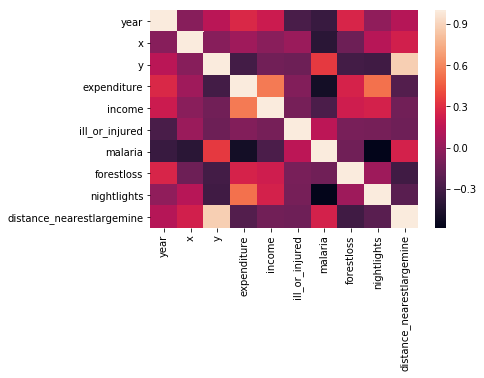

In [66]:
#Correlation Matrix
corrdf = df.corr()
corr = (corrdf)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# sns.title('Heatmap of Correlation Matrix')
corr

In [67]:
df.columns

Index(['year', 'x', 'y', 'expenditure', 'income', 'ill_or_injured', 'malaria',
       'forestloss', 'nightlights', 'distance_nearestlargemine'],
      dtype='object')

In [68]:
df.isnull().any()

year                          True
x                            False
y                            False
expenditure                   True
income                        True
ill_or_injured                True
malaria                       True
forestloss                    True
nightlights                   True
distance_nearestlargemine    False
dtype: bool

In [69]:
print(df[df["year"].isnull()])
#df.head()

      year        x        y  expenditure  income  ill_or_injured  malaria  \
1590   NaN  0.57982  7.83256          NaN     NaN             NaN      NaN   
1591   NaN  0.63470  6.02610          NaN     NaN             NaN      NaN   
1592   NaN  0.70544  5.84189          NaN     NaN             NaN      NaN   

      forestloss  nightlights  distance_nearestlargemine  
1590         NaN          NaN                 185603.190  
1591         NaN          NaN                  86881.336  
1592         NaN          NaN                 102678.480  


Since these three rows do not contain any economic and health data that we want to combine with small scale mining we drop these rows.

In [70]:
df.describe()

,year,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine
count,1590.000000,1593.000000,1593.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1593.000000
mean,1685.407547,-1.113771,7.386736,1144.462657,1618.409123,0.192963,0.414778,0.003691,5.440169,104754.233128
std,718.072947,1.033284,1.894350,863.878698,2776.352511,0.121365,0.117298,0.006236,11.395047,99576.183657
min,98.000000,-3.203450,4.761240,80.285172,-35.787189,0.000000,0.091799,0.000000,0.000000,676.799930
25%,2005.000000,-1.901096,5.942012,547.153865,350.336130,0.101038,0.348880,0.000037,0.046607,26915.229000
50%,2012.000000,-1.012990,6.701314,907.142060,718.863950,0.171429,0.422190,0.000898,0.855386,63871.512000
75%,2013.000000,-0.265932,8.779180,1473.797550,1879.633350,0.267536,0.501839,0.004506,3.596005,175418.700000
max,2013.000000,1.192945,11.127133,7677.353500,61162.129000,0.628571,0.683214,0.072279,60.936462,369073.840000


# Data Exploration and Visualization

Showing Illness and Malaria over time

In [71]:
df = df[df['year']>0]
df2 = df
df2['newyear'] = np.where(df['year']<2000, df['year']+1900, df['year'])
df2 = df2.drop(['year'], axis=1)
df2.head()


,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine,newyear
0,-3.05622,6.86144,679.86713,344.251040,0.295238,0.627282,0.0,0.00000,76552.820,1998.0
1,-2.94462,6.35241,545.13544,514.467100,0.297297,0.628550,0.0,0.34153,69400.570,1998.0
2,-2.85447,7.74937,709.71167,511.725740,0.265823,0.603990,0.0,0.00000,47839.813,1998.0
3,-2.81880,10.72420,246.44479,85.705086,0.173913,0.553067,0.0,0.00000,245310.780,1998.0
4,-2.81525,6.88833,1034.02030,826.393370,0.125000,0.620716,0.0,0.00000,49765.992,1998.0


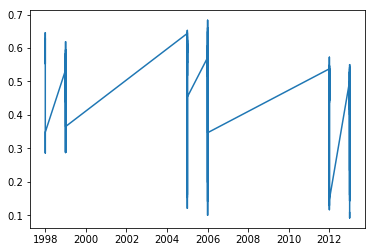

In [72]:
plt.plot(df2["newyear"], df["malaria"], '-')

In [73]:
df2.head()

,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine,newyear
0,-3.05622,6.86144,679.86713,344.251040,0.295238,0.627282,0.0,0.00000,76552.820,1998.0
1,-2.94462,6.35241,545.13544,514.467100,0.297297,0.628550,0.0,0.34153,69400.570,1998.0
2,-2.85447,7.74937,709.71167,511.725740,0.265823,0.603990,0.0,0.00000,47839.813,1998.0
3,-2.81880,10.72420,246.44479,85.705086,0.173913,0.553067,0.0,0.00000,245310.780,1998.0
4,-2.81525,6.88833,1034.02030,826.393370,0.125000,0.620716,0.0,0.00000,49765.992,1998.0


In [74]:
df2[['newyear','malaria']].groupby(['newyear'], as_index=False).mean().sort_values(by='malaria', ascending=False)
# display as line chart
#plt.plot()

,newyear,malaria
0,1998.0,0.508567
1,1999.0,0.487190
2,2005.0,0.437631
3,2006.0,0.423596
4,2012.0,0.379301
5,2013.0,0.375753


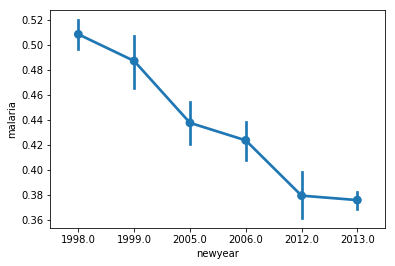

In [75]:
sns.pointplot(x='newyear',y='malaria',data=df2)

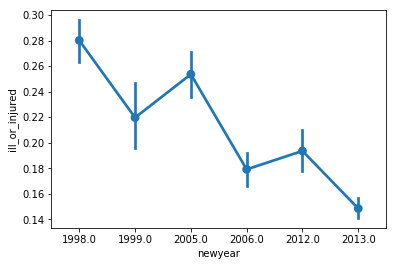

In [76]:
sns.pointplot(x='newyear',y='ill_or_injured',data=df2)

In [77]:
# takes too long
'''
grid = sns.FacetGrid(df2, row='malaria', col='newyear')
grid.map(plt.hist, 'distance_nearestlargemine', bins=4)
grid.add_legend()
'''

"\ngrid = sns.FacetGrid(df2, row='malaria', col='newyear')\ngrid.map(plt.hist, 'distance_nearestlargemine', bins=4)\ngrid.add_legend()\n"

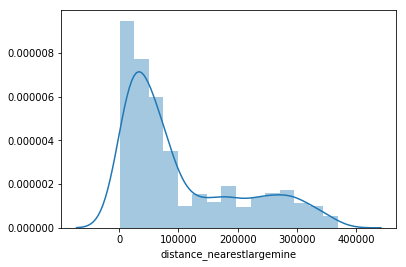

In [78]:
# Histogram
var = 'distance_nearestlargemine' # can also be malaria
sns.distplot(df2[var])

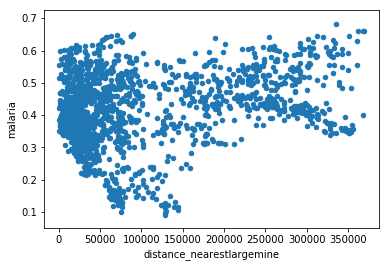

In [79]:
# scatter plot
xvar = 'distance_nearestlargemine'
yvar = 'malaria'
data = pd.concat([df2[yvar], df2[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar)

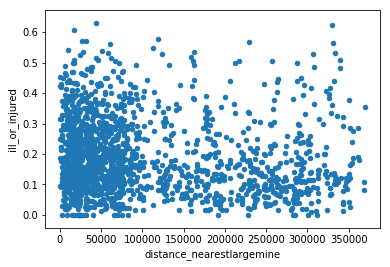

In [80]:
# scatter plot
xvar = 'distance_nearestlargemine'
yvar = 'ill_or_injured'
data = pd.concat([df2[yvar], df2[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar)

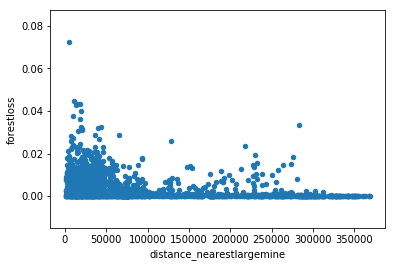

In [81]:
# scatter plot
xvar = 'distance_nearestlargemine'
yvar = 'forestloss'
data = pd.concat([df2[yvar], df2[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar)

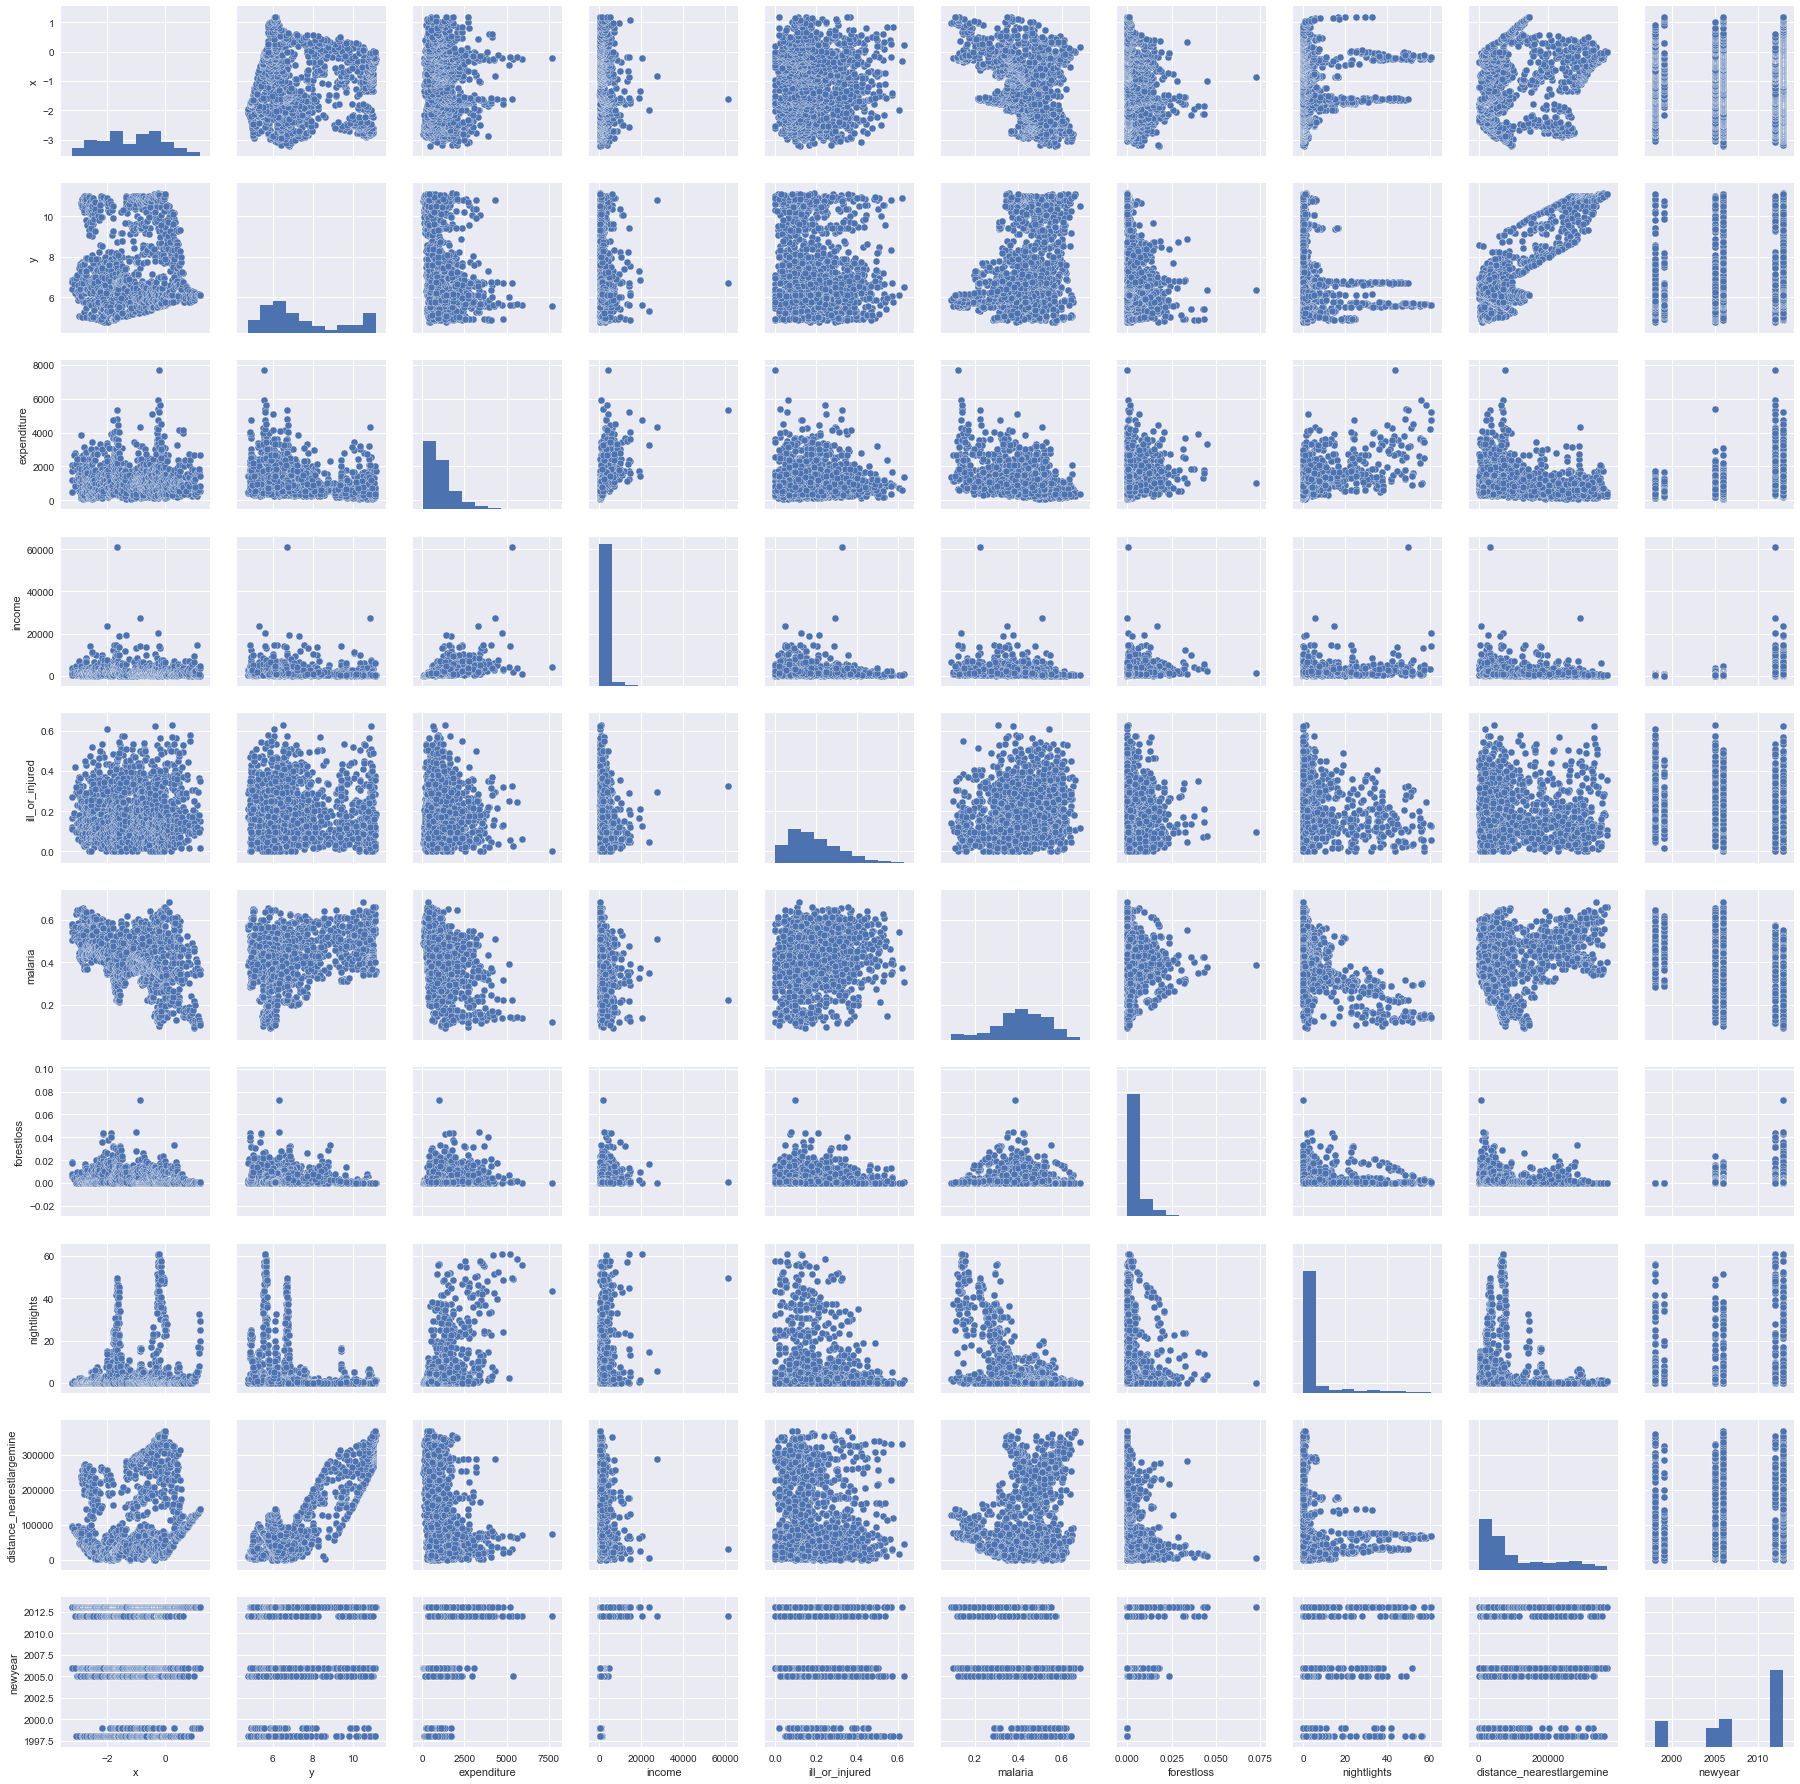

In [82]:
# scatterplot
sns.set()
cols = list(df2)
sns.pairplot(df2[cols], size=2.5)
plt.show()

# Linear Regression

We want to predict the distance of the next mine (large-scale mine at first) based on demographic data.

In [97]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Use only one feature
Ghana_X = df2

# Split the data into training/testing sets
Ghana_X_train = Ghana_X[:-20]
Ghana_X_test = Ghana_X[-20:]

Ghana_X_train = Ghana_X_train.drop(['distance_nearestlargemine'], axis=1)
Ghana_X_test = Ghana_X_test.drop(['distance_nearestlargemine'], axis=1)

print(Ghana_X_train.shape)

# Split the targets into training/testing sets
Ghana_y_train = Ghana_X.distance_nearestlargemine[:-20]
Ghana_y_test = Ghana_X.distance_nearestlargemine[-20:]

print(Ghana_y_train.shape)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Ghana_X_train, Ghana_y_train)

# Make predictions using the testing set
Ghana_y_pred = regr.predict(Ghana_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Ghana_y_test, Ghana_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Ghana_y_test, Ghana_y_pred))




(1570, 9)
(1570,)
Coefficients: 
 [  3.18977919e+04   4.33895870e+04  -2.17441074e-01  -9.10202092e-01
  -9.22865690e+03   1.90900042e+05  -4.79451080e+05   1.17104397e+03
   2.24554654e+03]
Mean squared error: 2957669460.53
Variance score: -24.70


In [98]:
print(Ghana_y_pred)

[  76100.27418027   54771.2740645    91657.55364338   47655.99603831
   72165.85995868   79380.61948192   54688.98593347   58297.37720134
   48533.72773229   92205.14834276   55049.09227945   64095.93023961
   92355.98611438   71285.72562565   62932.11799261   94503.82167468
   86045.85667761  112411.43301492  102395.80203612   97783.99769535]


In [99]:
print(Ghana_X_test)

             x         y  expenditure       income  ill_or_injured   malaria  \
1570  0.831925  6.097264   2078.63210    654.65192        0.094340  0.176080   
1571  0.852807  5.945805   2358.02220   2270.10550        0.547619  0.146350   
1572  0.895946  6.250390   1674.20790   3309.74580        0.093023  0.239892   
1573  0.913103  5.797498   1836.05580   5367.41210        0.306122  0.122973   
1574  0.913201  6.093806   1096.33180   1366.70120        0.171875  0.159483   
1575  0.962663  6.154547   1229.12980   1131.12920        0.207547  0.175747   
1576  0.976084  5.842508   1121.91780    922.45111        0.100000  0.104185   
1577  0.984233  6.032088   1817.71700   9197.77250        0.122449  0.121194   
1578  0.985236  5.884154   1364.83310   6485.58450        0.142857  0.091799   
1579  0.995941  6.232664   1169.33340   2426.44580        0.122449  0.217118   
1580  0.998201  5.938953   2688.31100   1580.98710        0.250000  0.097595   
1581  1.026971  6.039906   1296.15600   

ValueError: x and y must be the same size

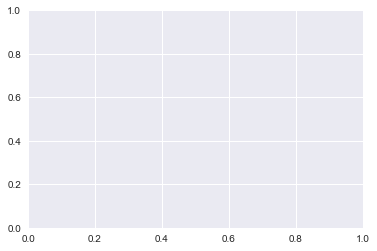

In [100]:
# Plot outputs
plt.scatter(Ghana_X_test, Ghana_y_test,  color='black')

plt.plot(Ghana_X_test, Ghana_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
